<a href="https://colab.research.google.com/github/patelyash9775/Deep-Learning-in-Tensorflow-2.x/blob/main/Advance%20Regression/01_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
os.chdir('drive/MyDrive/Advance Regression')

In [ ]:
ls

01-DataAnalysis.ipynb  CustomerData.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [ ]:
df = pd.read_csv('CustomerData.csv')
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


#### **Commons Question in Data Analysis**

1. Dimension
2. Features and Data types 
3. Categorical and Numerical
4. Distribution in the data 
5. Correlation between the features
6. Factor Analysis

In [ ]:
df.shape

(3209, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3209 non-null   int64  
 1   City                          3209 non-null   int64  
 2   NoOfChildren                  3209 non-null   int64  
 3   MinAgeOfChild                 3209 non-null   int64  
 4   MaxAgeOfChild                 3209 non-null   int64  
 5   Tenure                        3209 non-null   int64  
 6   FrquncyOfPurchase             3209 non-null   int64  
 7   NoOfUnitsPurchased            3209 non-null   int64  
 8   FrequencyOFPlay               3209 non-null   int64  
 9   NoOfGamesPlayed               3209 non-null   int64  
 10  NoOfGamesBought               3209 non-null   int64  
 11  FavoriteChannelOfTransaction  3209 non-null   object 
 12  FavoriteGame                  3209 non-null   object 
 13  Tot

**CustomerID - nominal level and unique**

**City, FavoriteChannelOfTransaction, FavoriteGame** - Catogorical Information

- Rest all are numerical information

In [ ]:
numerical_data = df.drop(['City','FavoriteChannelOfTransaction','FavoriteGame','CustomerID'],axis=1)
catgorical_data = df[['City','FavoriteChannelOfTransaction','FavoriteGame']]

In [ ]:
numerical_data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
0,2,3,8,210,11,11,2344,108,10,107.51
1,2,3,6,442,20,20,245,22,7,382.40
2,4,3,5,424,18,18,1059,130,18,135.01
3,1,6,6,261,11,9,365,34,11,125.00
4,3,6,9,422,44,31,1066,102,44,335.05


In [ ]:
catgorical_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


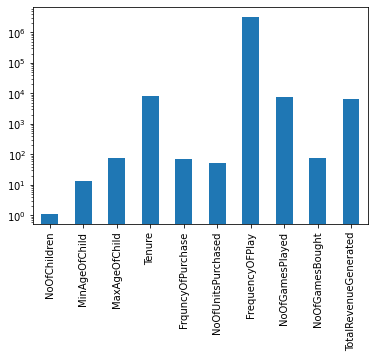

In [ ]:
numerical_data.var().plot(kind='bar',logy=True)

In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

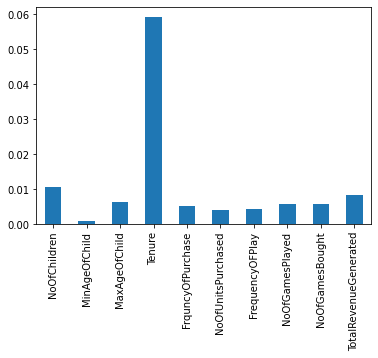

In [ ]:
pd.DataFrame(sc.fit_transform(numerical_data),columns=numerical_data.columns).var().plot(kind='bar')

**Tenure - has large variance**

**MinAge of Child - has minimum variance**

In [ ]:
catgorical_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


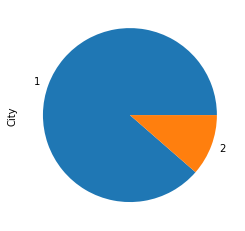

In [ ]:
catgorical_data['City'].value_counts(normalize=True).plot(kind='pie')

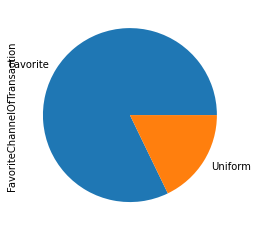

In [ ]:
catgorical_data['FavoriteChannelOfTransaction'].value_counts(normalize=True).plot(kind='pie')

Uniform     0.951387
Favorite    0.039265
NONE        0.009349
Name: FavoriteGame, dtype: float64

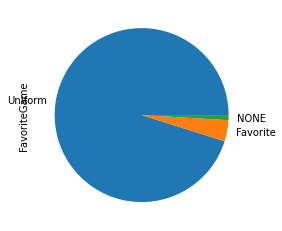

In [ ]:
catgorical_data['FavoriteGame'].value_counts(normalize=True).plot(kind='pie')
catgorical_data['FavoriteGame'].value_counts(normalize=True)

# Correlation

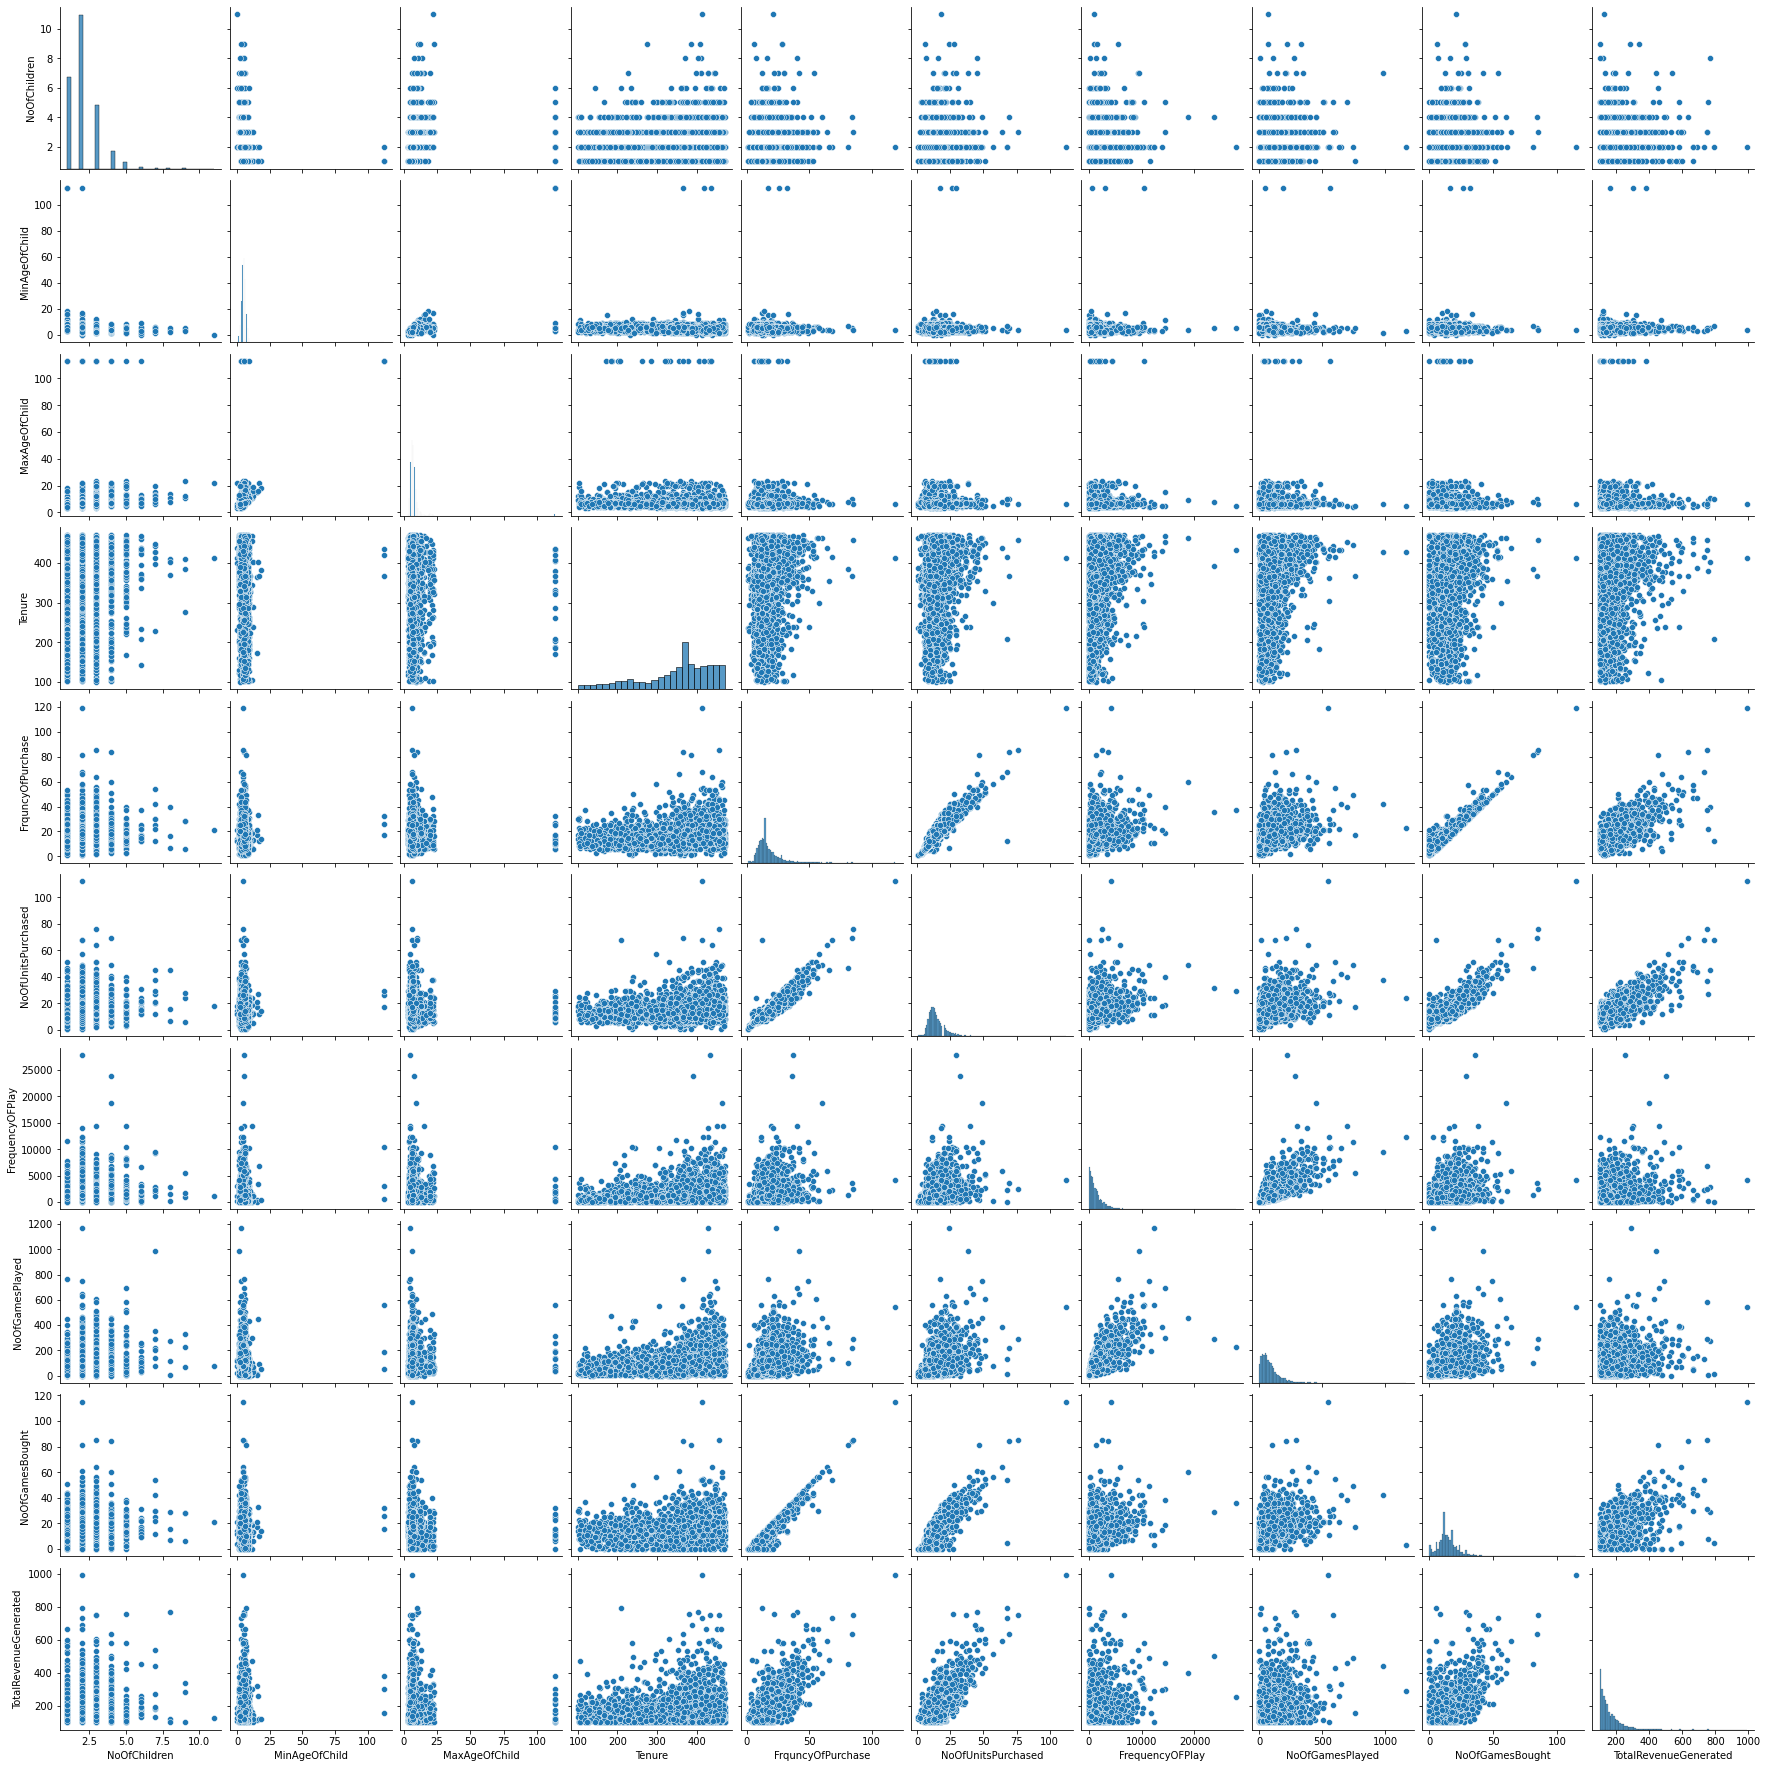

In [ ]:
sns.pairplot(numerical_data)

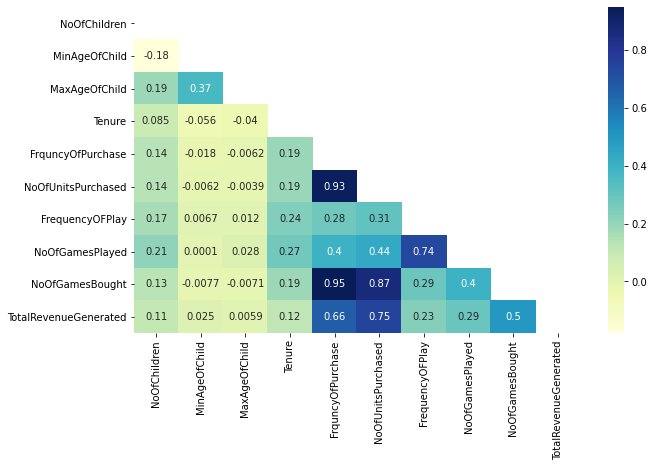

In [ ]:
plt.figure(figsize=(10,6))
corr = numerical_data.corr()

# mask
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,cmap='YlGnBu',mask=mask)

# Multi colinearity
  - no.ofunitspurchased,freqofpurchase,no.ofgamesbought
  - no.ofgamesplayes,frequencyOfPlay

- FRequency of purchase , No.units purchased has high correlation wrt total revenue generated

# Factor Analysis

In [ ]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


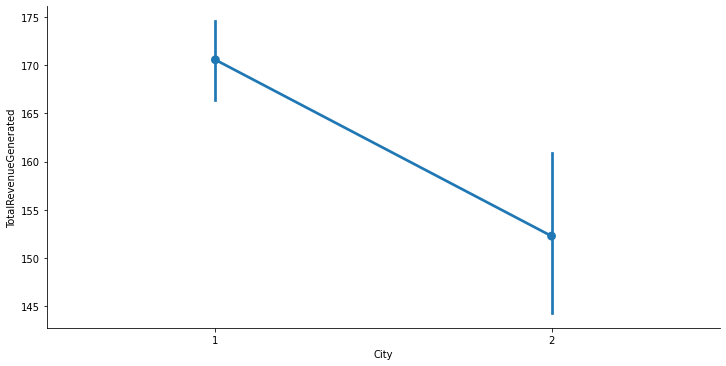

In [ ]:
sns.catplot(x='City',y='TotalRevenueGenerated',kind='point',ci=99,data=df,aspect=2)

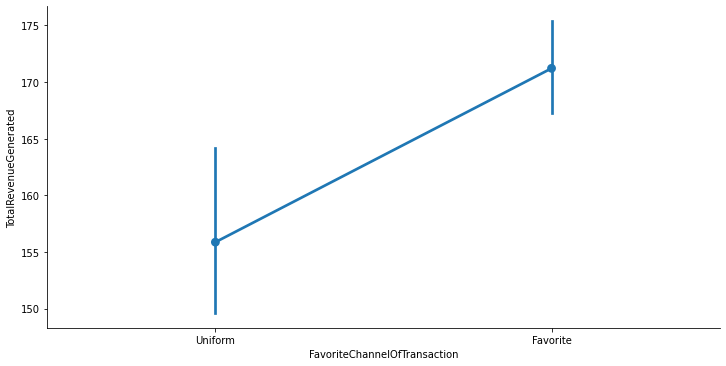

In [ ]:
sns.catplot(x='FavoriteChannelOfTransaction',y='TotalRevenueGenerated',kind='point',ci=99,data=df,aspect=2)

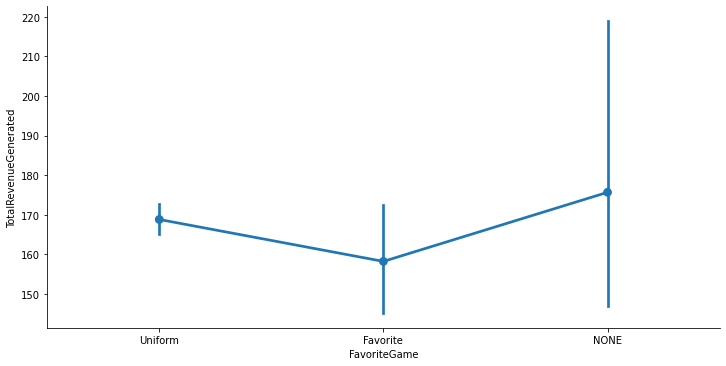

In [ ]:
sns.catplot(x='FavoriteGame',y='TotalRevenueGenerated',kind='point',ci=99,data=df,aspect=2)

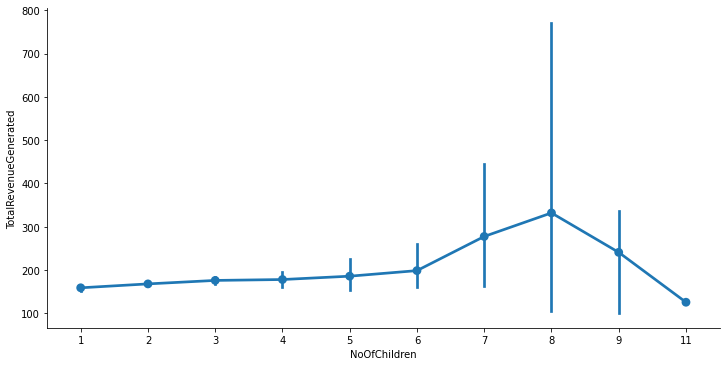

In [ ]:
sns.catplot(x='NoOfChildren',y='TotalRevenueGenerated',kind='point',ci=99,data=df,aspect=2)

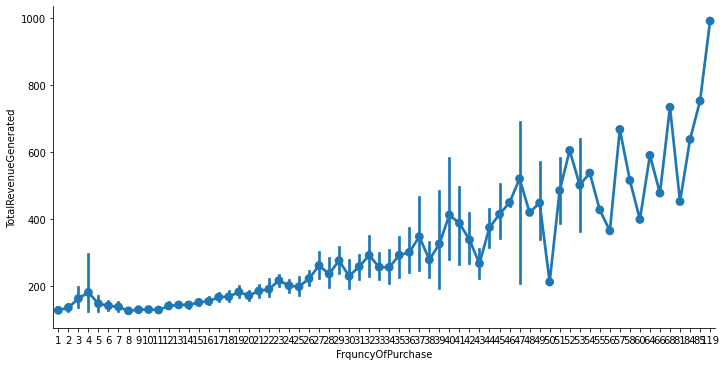

In [ ]:
sns.catplot(x='FrquncyOfPurchase',y='TotalRevenueGenerated',kind='point',ci=99,data=df,aspect=2)

#**Conclusion** : -

1. **CustomerID** is unique key and has to drop it.
2. **City,FavoriteChannelOfTransaction,FavoriteGame** are categorical variables for that we need to create **$n-1$** dummies.
3. **Tenure** has highest variance whereas **MinAgeOfChild** has least variance
4. From pairplot **MinAgeofChild** and **MaxAgeofChild** has outlier.
5. There is **MultiColinearity** effect between the variables.
  - FreqOfPurchase & NoOfUnitsPurchased
  - FreqOfPurchase & NoOfGamesBought
  - NoOfUnitsPurchased & NoOfGamesBought
  - FreqOfPlay & NoOfGamesPlay

6. FactorAnalysis:
  - Categorical data 
    - **City,FavoriateChannelTransaction** has good correlation wrt Total Revenue Generated
  - Numerical data
    -  **FreqOfPurchased, NoOfUnitsPurchased, NoOfGamesBought** has good correlation wrt Total Revenue Generated

# **Data** **Preprocessing**

In [ ]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
df_new = df[df['MinAgeOfChild'] < 100]

In [ ]:
df_new = df[df['MaxAgeOfChild'] < 100]

In [ ]:
# split the data into dependent and independent
X = df_new.iloc[:,:-1] #independent
y = df_new.iloc[:,-1:] #dependent

In [ ]:
# split the data into numerical and catogorical
x_num = X.drop(['City','FavoriteChannelOfTransaction','FavoriteGame'],axis=1)
x_cat = X[['City','FavoriteChannelOfTransaction','FavoriteGame']]

In [ ]:
# For categorical we need to create n-1 dumies

city_dum = pd.get_dummies(x_cat['City'],prefix='city')
fct_dum = pd.get_dummies(x_cat['FavoriteChannelOfTransaction'],prefix='fct')
fg_dum = pd.get_dummies(x_cat['FavoriteGame'],prefix='fg')

In [ ]:
dummies = pd.concat((city_dum.drop('city_2',axis=1),
                     fct_dum.drop('fct_Uniform',axis=1),
                     fg_dum.drop('fg_NONE',axis=1)),axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler # z-score
scx = StandardScaler()
scy = StandardScaler()

In [ ]:
x_num_norm = pd.DataFrame(scx.fit_transform(x_num.values),columns=x_num.columns)

In [ ]:
y_norm = pd.DataFrame(scx.fit_transform(y.values),columns=y.columns)

In [ ]:
dummies.reset_index(inplace=True)

In [ ]:
x_norm=pd.concat((x_num_norm,dummies),axis=1)

In [ ]:
import pickle

In [ ]:
os.mkdir('preprocessing')

In [ ]:
pickle.dump(x_norm,open('preprocessing/x_norm.pickle','wb'))
pickle.dump(y_norm,open('preprocessing/y_norm.pickle','wb'))

In [ ]:
ls preprocessing/

x_norm.pickle  y_norm.pickle
